# Cleaning

In [61]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

# Graphs for features

In [62]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [63]:
def stacked_numerical_histogram(df1, df2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    plt.figure(figsize=(10,6))
    plt.hist([df1[column_name], df2[column_name]], bins=20,  color=colors, edgecolor='black', stacked=True)
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['Original', 'Counterfactual'])
    plt.show()

In [64]:
def stacked_cat_histogram(df_1, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    #grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    #p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend([p1[0]], ['Original'])
    plt.show()

# Merged performance metrics

In [65]:
def distrubution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The list of the Scores that will be plotted.
    1st True False is a flag to determine if the data is mean of iterations or not.
    2nd True False is a flag to determine if the data is only CFs or CFs + original data.    
    """
    # Get the default values of the models
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    sim_rf_line = df[df['Model'].str.startswith('RF_simp_def_1')][name].iloc[0]
    sim_rf_line_2 = df[df['Model'].str.startswith('RF_simp_def_2')][name].iloc[0]

    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'RF_simp_def_1')& (df['Model'] != 'RF_simp_def_2')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'RF_simp_def_1_mean_of_iterations') & (df['Model'] != 'RF_simp_def_2_mean_of_iterations')]

    # Get the sample size, CF Num and Iteration values    
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()
    
    # Split the DataFrame based on the 'Model' column
    df_rf_simp_1 = df[df['Model'].str.startswith('RF_simp_1')]
    df_rf_simp_2 = df[df['Model'].str.startswith('RF_simp_2')]
    
    # Get the first y values
    y_1 = df_rf_simp_1[name]
    y_err_1 = df_rf_simp_1[name+'_std']
    # Get the second y values
    y_2 = df_rf_simp_2[name]
    y_err_2 = df_rf_simp_2[name+'_std']

    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(17,9))

    
    # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
    # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
    if true_false_1 is True:
        plt.errorbar(combined_x, y_2, yerr=y_err_2, fmt='o', color="r",  capsize=6, label="{} Valuesof RF n:70 dep:10".format(name))
        plt.errorbar(combined_x, y_1, yerr=y_err_1, fmt='o', color="blue",  capsize=6, label="{} Values of RF n:50 dep:5".format(name))
        
        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default RF Mean of {}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='g', linestyle='--', label="Simple RF n:70 dep:10 Mean of {}".format(x_3))  # Plot LR_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='#c48716', linestyle='--', label="Simple RF n:50 dep:5 Mean of {}".format(x_3))  # Plot RF_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility        
        
        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
    else:
        plt.plot(combined_x, y_2, 'o-', color="r", label="{} Values of RF n:70 dep:10".format(name))
        plt.plot(combined_x, y_1, 'o-', color="blue", label="{} Values of RF n:50 dep:5".format(name))
        
        plt.axhline(y=rf_line, color='k', linestyle='--', label="Default RF Line")  # Plot RF_line as a horizontal line
        plt.axhline(y=sim_rf_line_2, color='g', linestyle='--', label="Simple RF n:70 dep:10 ")  # Plot LR_line as a horizontal line
        plt.axhline(y=sim_rf_line, color='#c48716', linestyle='--', label="Simple RF n:50 dep:5 ")  # Plot RF_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility    

        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    #plt.show()

In [66]:
df_1 = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_3166__1_2 .xlsx')
df_2 = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_6331_9495__1_2 .xlsx')
df_3 = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_3166__1_2 .xlsx')
df_4 = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_6331_9495__1_2 .xlsx')
df_5 = pd.read_excel('Performance_metrics\model_perf_metrics_merged_3166__1_2 .xlsx')
df_6 = pd.read_excel('Performance_metrics\model_perf_metrics_merged_6331_9495__1_2 .xlsx')
df_7 = pd.read_excel('Performance_metrics\model_perf_metrics_merged_only_with_cfs_3166__1_2 .xlsx')
df_8 = pd.read_excel('Performance_metrics\model_perf_metrics_merged_only_with_cfs_6331_9495__1_2 .xlsx')

In [67]:
combined_df1 = pd.concat([df_1, df_2])
cleaned_df1 = combined_df1.drop_duplicates()

combined_df2 = pd.concat([df_3, df_4])
cleaned_df2 = combined_df2.drop_duplicates()

combined_df3 = pd.concat([df_5, df_6])
cleaned_df3 = combined_df3.drop_duplicates()

combined_df4 = pd.concat([df_7, df_8])
cleaned_df4 = combined_df4.drop_duplicates()



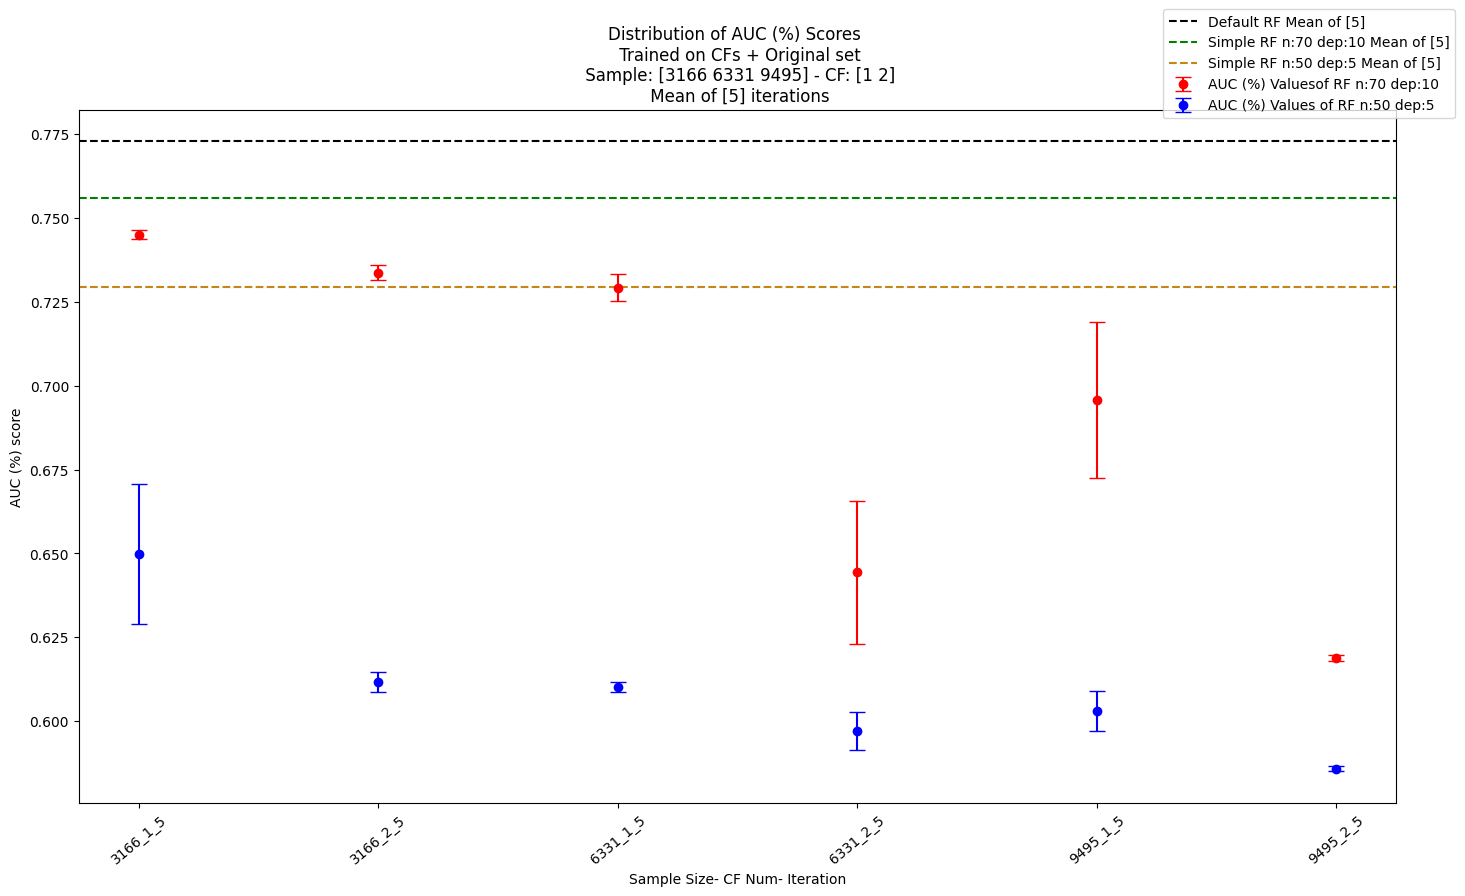

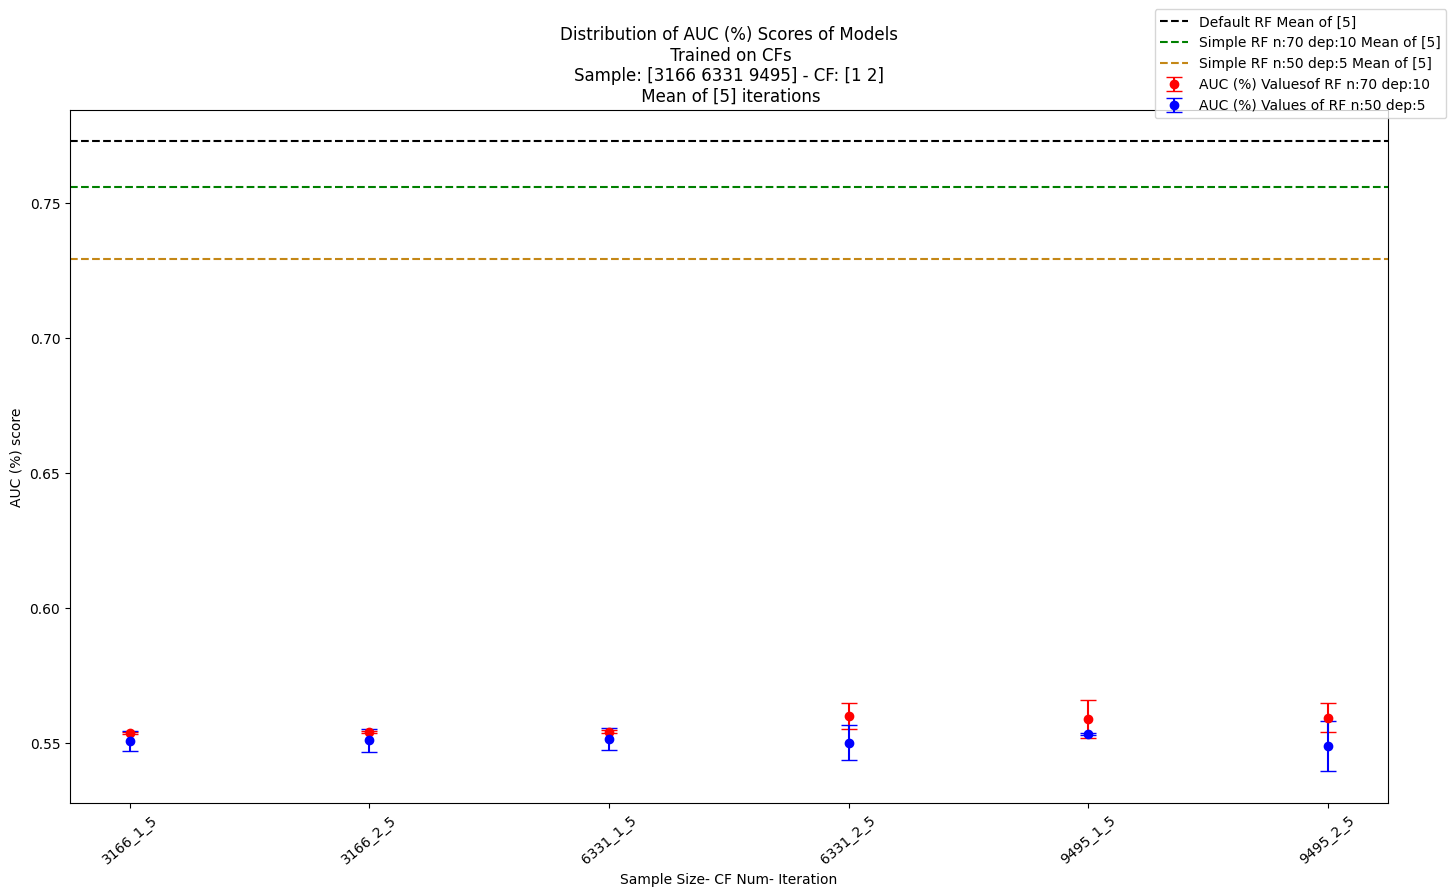

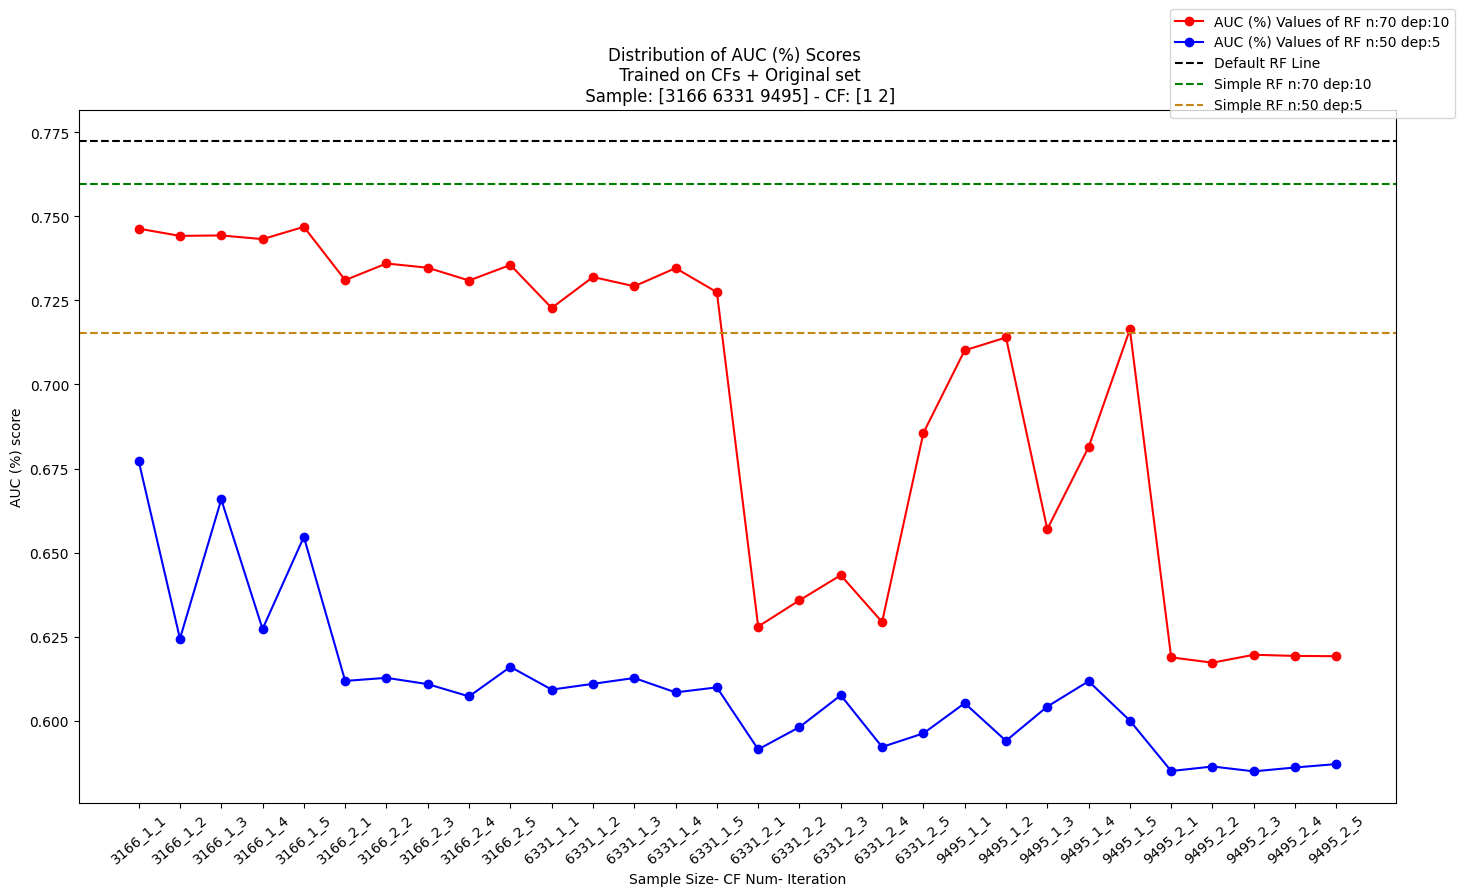

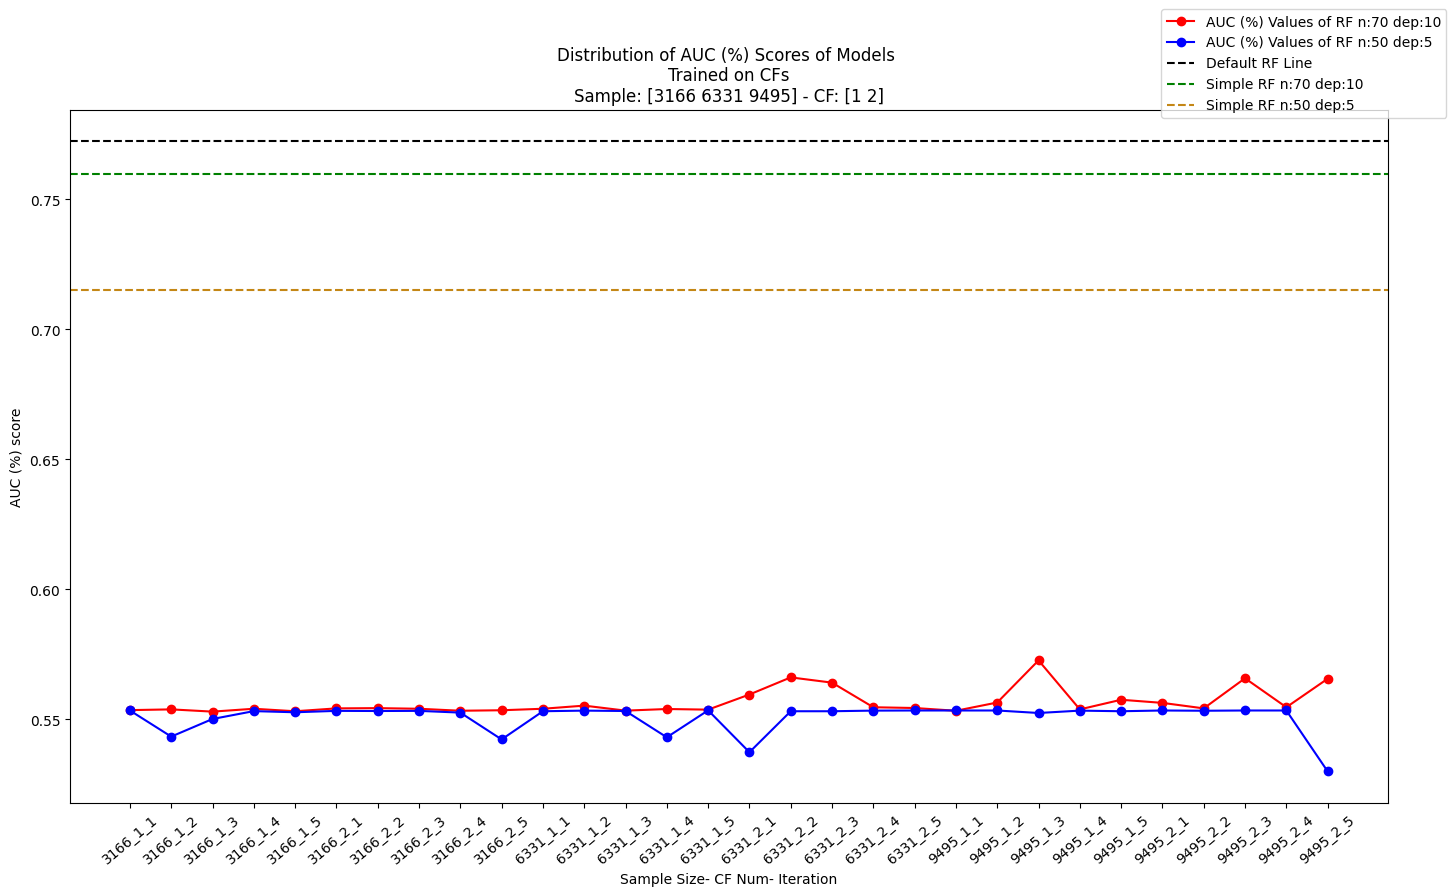

In [68]:
distrubution_plot(combined_df1, 'AUC (%)', True, False)
distrubution_plot(combined_df2, 'AUC (%)', True, True)
distrubution_plot(combined_df3, 'AUC (%)', False, False)
distrubution_plot(combined_df4, 'AUC (%)', False, True)
